In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
yf.pdr_override()

In [7]:
data = pdr.get_data_yahoo('IFIX.SA', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-11,2793.030029,2799.590088,2788.810059,2791.800049,2791.800049,0


In [6]:
start_date = '2020-03-16'
stocks = ['VIVT4.SA', 'LREN3.SA', 'CCRO3.SA', 'EQTL3.SA', 'RADL3.SA', 'BOVA11.SA']

In [36]:
data = pdr.get_data_yahoo(stocks, start=start_date, end=end_date)

[*********************100%***********************]  6 of 6 completed


In [37]:
close_data = data['Close']

In [38]:
for stock in stocks:
    base_value = close_data[stock][0]
    close_data[stock] = close_data[stock] / base_value

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
close_data

,BOVA11.SA,CCRO3.SA,EQTL3.SA,LREN3.SA,RADL3.SA,VIVT4.SA
Date,,,,,,
2020-03-16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-17,1.024827,1.012605,1.066272,1.044444,1.086947,1.075015
2020-03-18,0.938366,0.897479,0.969828,0.867209,1.061053,1.067336
2020-03-19,0.938222,0.884034,0.959052,0.997290,1.128105,1.140579
2020-03-20,0.934902,0.870588,0.930496,0.932520,1.182737,1.052963
...,...,...,...,...,...,...
2020-08-24,1.419602,1.131092,1.300108,1.137940,1.135053,0.983068
2020-08-25,1.415849,1.134454,1.300108,1.186721,1.130842,0.979720
2020-08-26,1.395497,1.117647,1.281250,1.165312,1.136211,0.973223


In [40]:
(close_data['CCRO3.SA'][-1] - 1) * 100

12.941176564871416

In [41]:
print('Profits: ')
for stock in stocks:
    print('{} => {}%'.format(stock, ((close_data[stock][-1] - 1) * 100)))

Profits: 
VIVT4.SA => -2.441428738166662%
LREN3.SA => 18.48238323253504%
CCRO3.SA => 12.941176564871416%
EQTL3.SA => 29.741382632541978%
RADL3.SA => 13.315791079872529%
BOVA11.SA => 41.887997667131984%


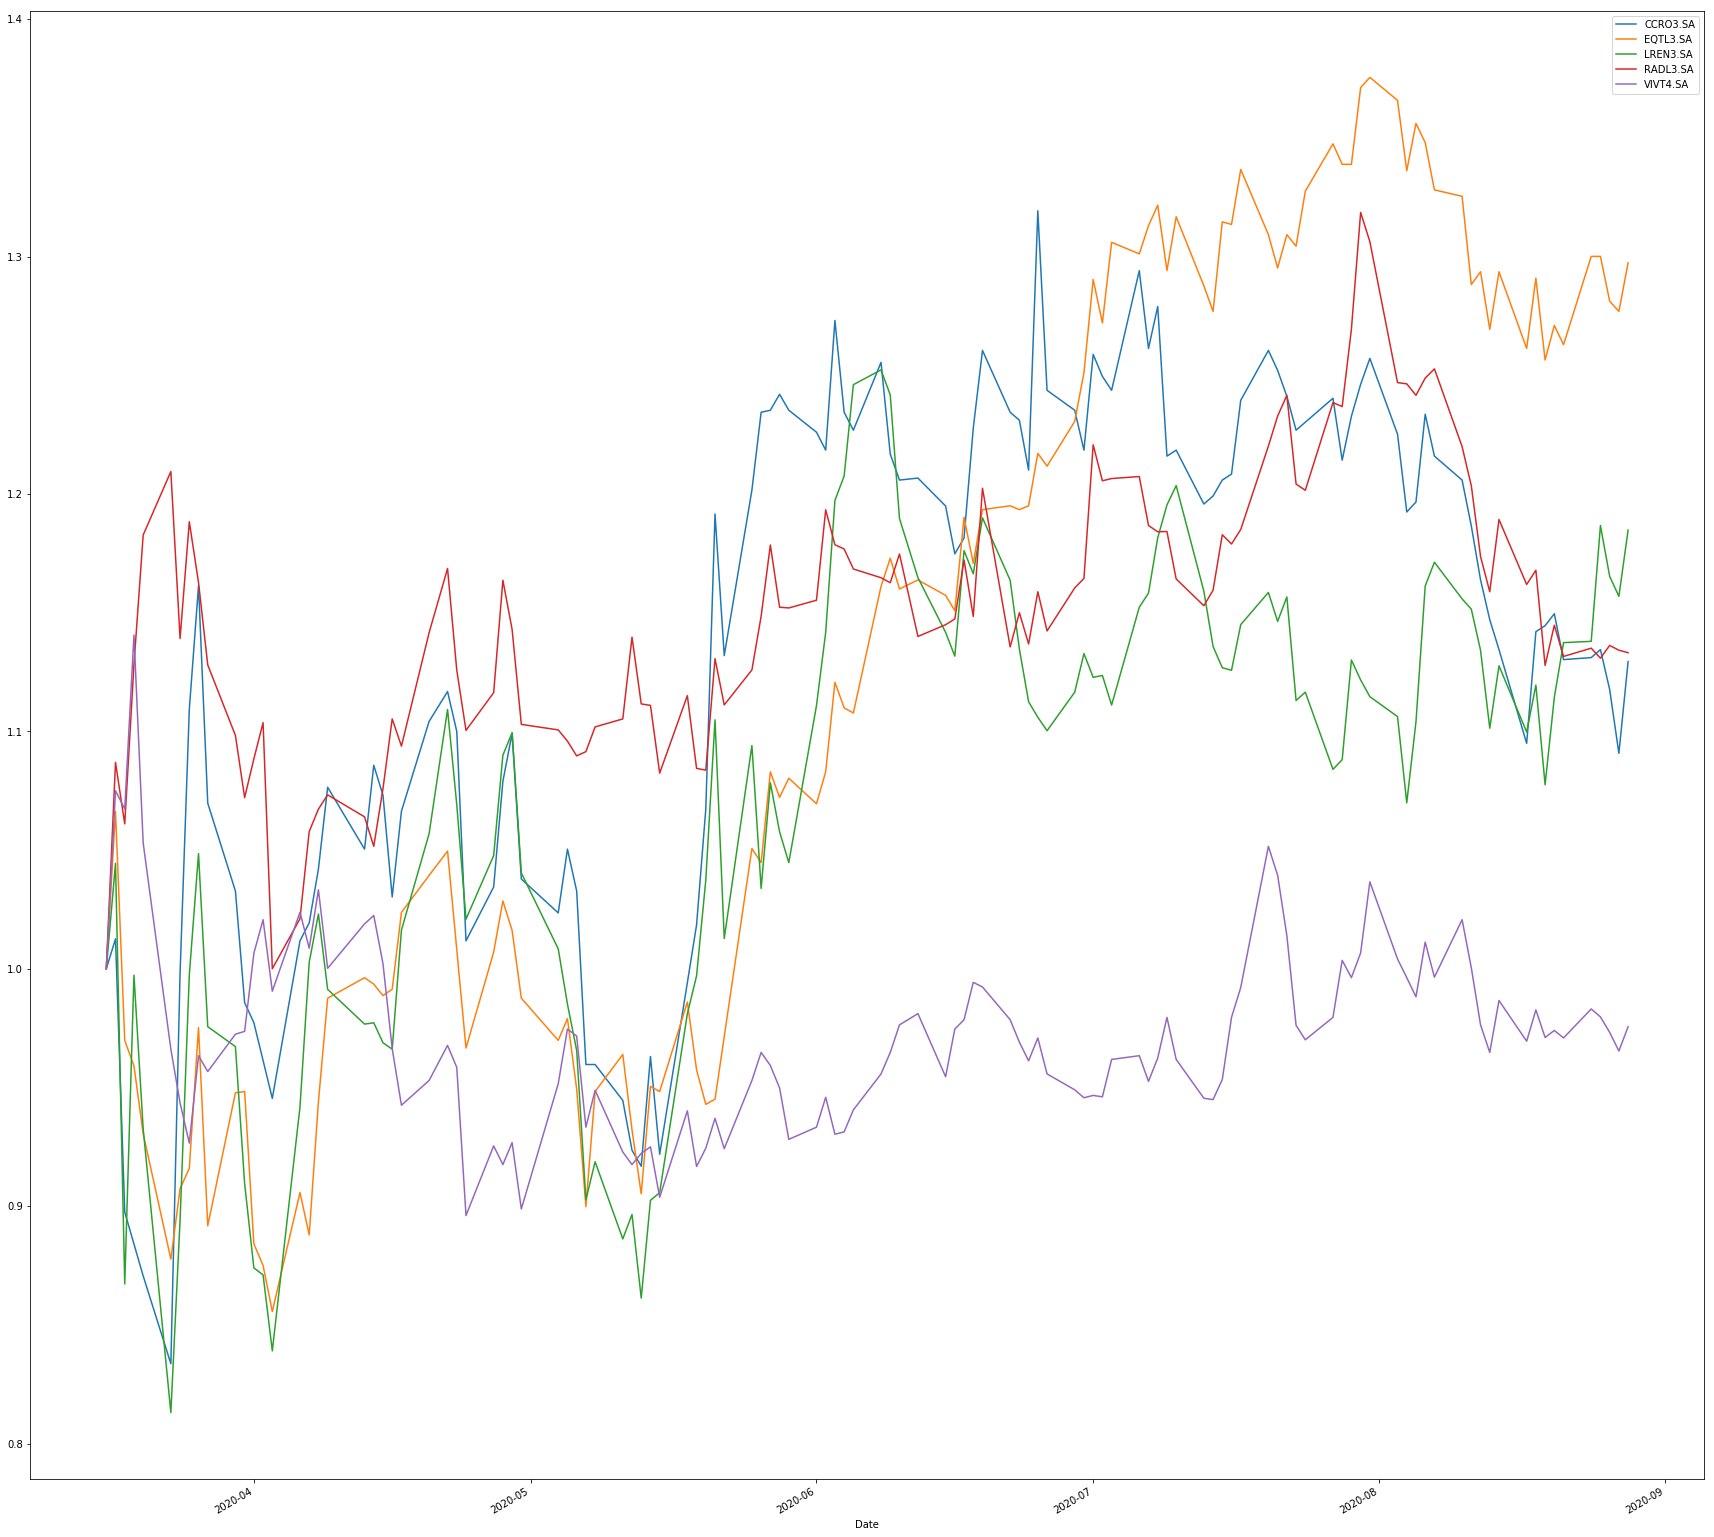

In [27]:
close_data.plot(figsize=(30,30))